### Project A
#### 1.1 Preliminary analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import itertools
import math
from scipy.stats import zscore
import matplotlib.dates as mdates

data = pd.read_csv('../data/dataset.csv', sep=',')
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y')
data.set_index('Date', inplace=True)
print(data.shape)
summary = data.describe()
summary.loc['skewness'] = data.skew()
summary.loc['kurtosis'] = data.kurt() 

summary
#with open('descriptive_table.tex', 'w') as f:
    #f.write(summary.to_latex())


(2728, 14)


ADA-USD      BCH-USD        BTC-USD     DOGE-USD      ETH-USD  \
count     2728.000000  2728.000000    2728.000000  2728.000000  2728.000000   
mean         0.479793   421.390927   29373.430990     0.081687  1511.056712   
std          0.534559   377.723250   24492.393261     0.101991  1231.384682   
min          0.018490    61.710000    3232.510000     0.000976    84.120000   
25%          0.086270   221.912500    8891.535000     0.002847   285.182500   
50%          0.332400   315.295000   21746.255000     0.061800  1437.775000   
75%          0.591550   485.635000   43828.147500     0.119800  2460.335000   
max          2.968000  3715.910000  106155.610000     0.689400  4810.970000   
skewness     1.883221     3.146395       1.072013     1.732643     0.510481   
kurtosis     3.673605    13.630490       0.453360     3.341099    -0.921651   

             LINK-USD      LTC-USD     MANA-USD      XLM-USD      XRP-USD  \
count     2728.000000  2728.000000  2728.000000  2728.000000  2728.000000   
mean         9.940025    95.166672     0.502241     0.175486     0.603975   
std          9.309587    54.285597     0.738767     0.128498     0.499196   
min          0.149500    23.120000     0.006890     0.011810     0.138500   
25%          1.878500    58.747500     0.062562     0.089300     0.315100   
50%          7.210000    76.905000     0.294500     0.116600     0.479550   
75%         15.145000   115.497500     0.617375     0.242775     0.637575   
max         52.300000   388.280000     5.190000     0.884800     3.294000   
skewness     1.081960     1.709261     2.914908     1.471262     2.770198   
kurtosis     0.876995     3.381328     9.427163     1.898925     8.492153   

                  SPXT          XCMP         SOFR          VIX  
count      2728.000000   2728.000000  2728.000000  2728.000000  
mean       8106.179648  14102.152130     1.057841    19.378783  
std        2335.935153   4610.960505     0.048789     7.584518  
min        4559.500000   7194.020038     0.993372     9.140000  
25%        5843.825000   9355.677816     1.030696    14.020000  
50%        8207.760000  14067.613660     1.042110    17.610000  
75%        9469.087500  17268.648288     1.077273    22.505000  
max       13510.290000  24641.851710     1.186028    82.690000  
skewness      0.482733      0.334626     1.082501     2.464794  
kurtosis     -0.684492     -0.870130     0.262128    11.371234

In [2]:
print('Missing values:', data.isnull().sum().sum())

print('Duplicates:', data.duplicated().sum())

print("Non-numeric columns:", data.select_dtypes(exclude=['number']).columns)

Missing values: 0
Duplicates: 0
Non-numeric columns: Index([], dtype='object')


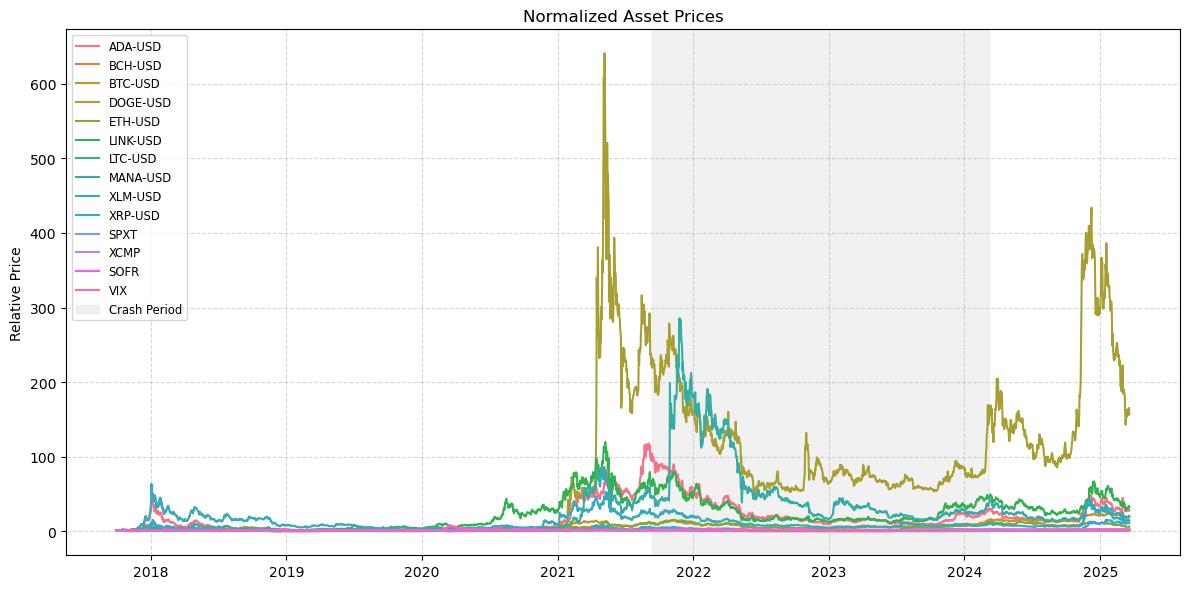

In [3]:
# Normalize the data
normalized_data = data.div(data.iloc[0])  # Works if index is not interfering
plt.figure(figsize=(12, 6))
for column in normalized_data.columns:
  plt.plot(normalized_data.index, normalized_data[column], label=column, color= sns.color_palette("husl", len(normalized_data.columns))[list(normalized_data.columns).index(column)])
  
plt.axvspan(pd.to_datetime('2021-09-11'), pd.to_datetime('2024-03-07'), color='lightgray', alpha=0.3, label='Crash Period')
plt.title("Normalized Asset Prices")
plt.ylabel("Relative Price")
plt.legend(loc='upper left', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# plt.show()
# plt.savefig(r'C:\Users\seves\Documents\EPFL - VS Studio\Blockchain\graphs\Normalized Asset Prices.png')


#### 1.2 Log Returns vs Linear Returns

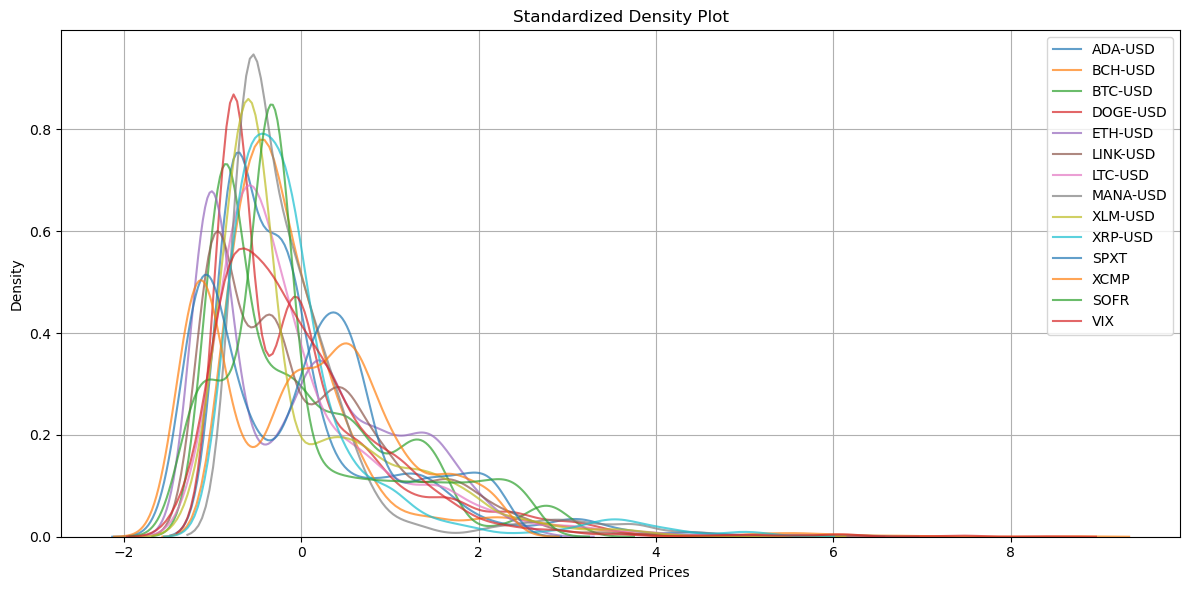

In [4]:
# Density plots of price 

# Standardize the data
columns = data.columns
standardized_data = data[columns].apply(lambda x: (x - x.mean()) / x.std())

plt.figure(figsize=(12, 6))
for asset in columns:
    sns.kdeplot(standardized_data[asset], label=asset, fill=False, alpha=0.7)
plt.title('Standardized Density Plot')
plt.xlabel('Standardized Prices')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.tight_layout()

# plt.show()
# plt.savefig(r'C:\Users\seves\Documents\EPFL - VS Studio\Blockchain\graphs\Standardized Density Plot.png')

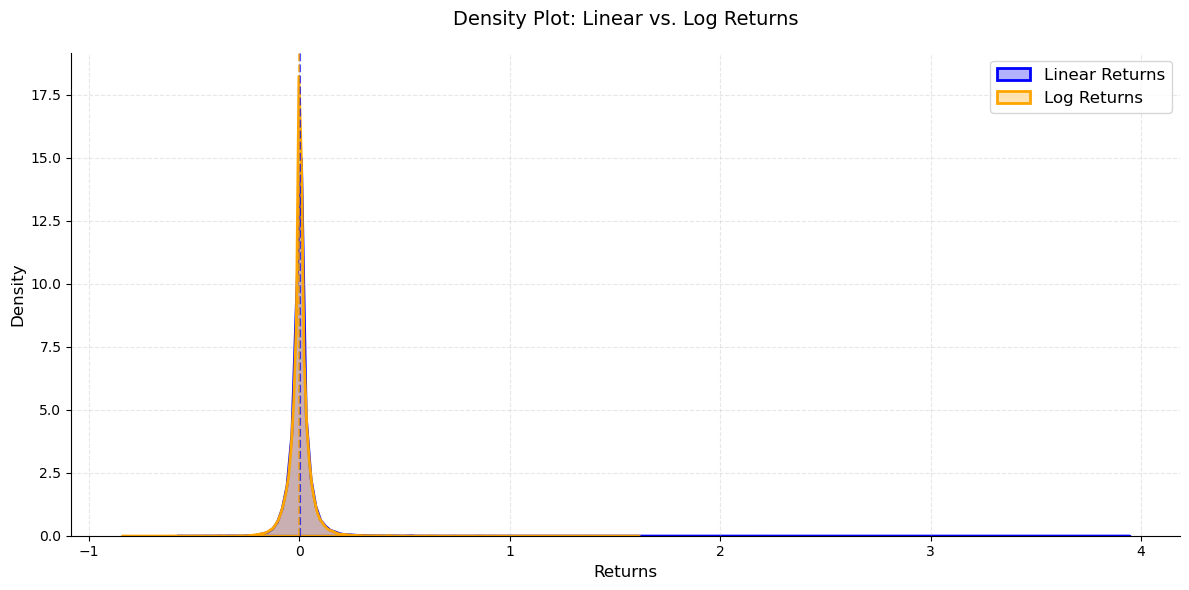

In [5]:
# Linear returns
linear_returns = ((data - data.shift(1)) / data.shift(1)).dropna()

# Log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Lin vs log density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(linear_returns.values.flatten(), 
            color='blue', 
            label='Linear Returns', 
            linewidth=2,
            fill=True, 
            alpha=0.3)

sns.kdeplot(log_returns.values.flatten(), 
            color='orange', 
            label='Log Returns', 
            linewidth=2,
            fill=True, 
            alpha=0.3)

plt.title('Density Plot: Linear vs. Log Returns', fontsize=14, pad=20)
plt.xlabel('Returns', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
sns.despine()
plt.axvline(x=np.mean(linear_returns), color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=np.mean(log_returns), color='orange', linestyle='--', alpha=0.7)
plt.tight_layout()
# plt.show()
# plt.savefig(r'C:\Users\seves\Documents\EPFL - VS Studio\Blockchain\graphs\Density Plot Linear vs Log Return.png')

### 1.3 Outliners detection and treatment

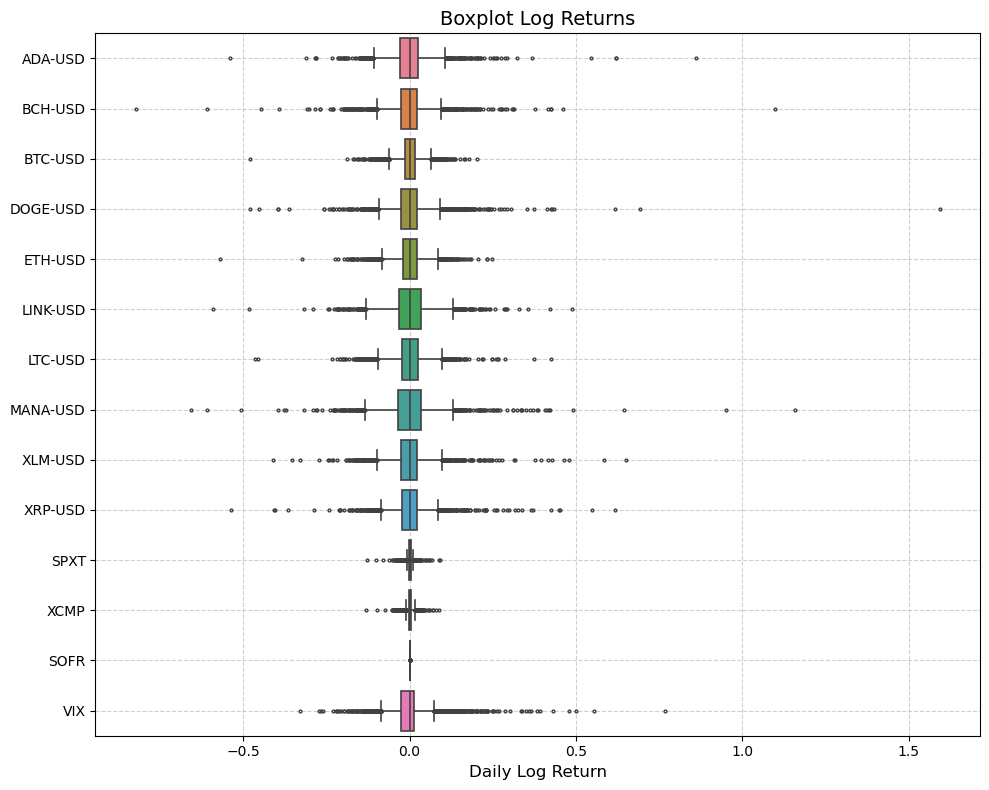

In [6]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=log_returns, orient='h', fliersize=2, linewidth=1.2)
plt.title("Boxplot Log Returns", fontsize=14)
plt.xlabel("Daily Log Return", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
# plt.show()
# plt.savefig(r'C:\Users\seves\Documents\EPFL - VS Studio\Blockchain\graphs\Boxplot Log Return.png')

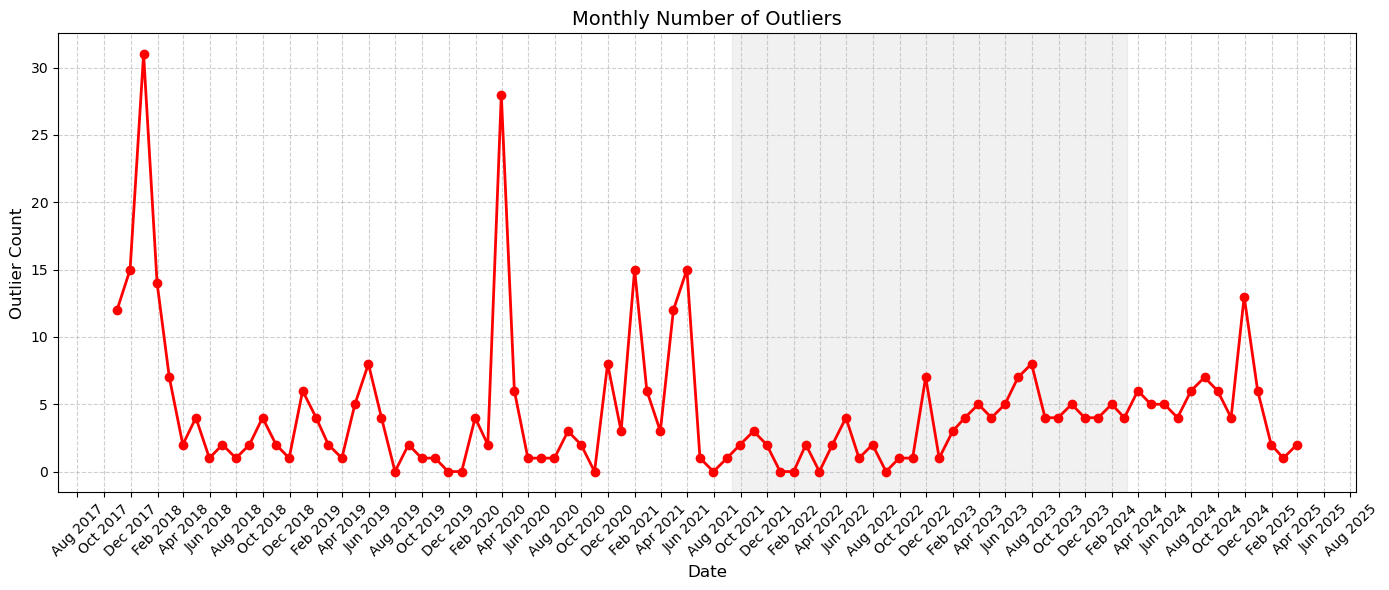

In [7]:
z_scores = zscore(log_returns)
outliers_mask = z_scores > 3
outliers_per_date = pd.DataFrame(outliers_mask, index=log_returns.index, columns=log_returns.columns).sum(axis=1)

monthly_outliers = outliers_per_date.resample('ME').sum()

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(monthly_outliers.index, monthly_outliers.values, color='red', marker='o', linewidth=2)
plt.axvspan(pd.to_datetime('2021-09-11'), pd.to_datetime('2024-03-07'), color='lightgray', alpha=0.3, label='Crash Period')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Show every 2nd month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., "Jan 2022"
plt.xticks(rotation=45)
ax.set_title("Monthly Number of Outliers", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Outlier Count", fontsize=12)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
# plt.show()


Outliers do not seem to depend on specific time periods, as their frequency remains high across both normal and crisis periods. This indicates that extreme values are a recurring feature of the data, rather than being limited to particular market conditions.

#### 1.4 Total return Indexes
Check report

#### 1.5 Zero returns over weekends

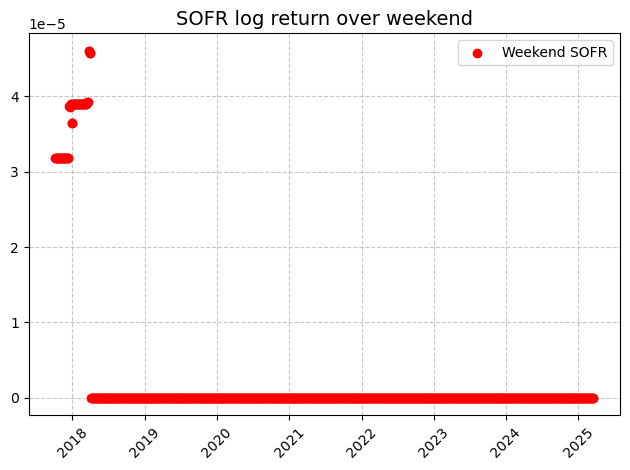

In [8]:
weekend = log_returns.index.weekday >= 5  # 5 for Saturday, 6 for Sunday
traditional_assets = ['SPXT', 'XCMP', 'SOFR', 'VIX']

# Check SOFR 'cause it initially looks like it does not have weekend gaps
plt.scatter(log_returns.index[weekend], log_returns['SOFR'][weekend], color='red', label='Weekend SOFR', zorder=5)
plt.title('SOFR log return over weekend', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.show()

# Carry-forward imputation for the weekend gaps
for asset in traditional_assets:
    log_returns[asset] = log_returns[asset].where(~weekend, other=None).ffill()

# Verify the changes  #e.g. 7/10/2017 is a saturday print(log_returns[traditional_assets].head(10))

#### 1.6 Correlation and dependence analysis

Text(0.5, 1.0, 'Correlation Heatmap')

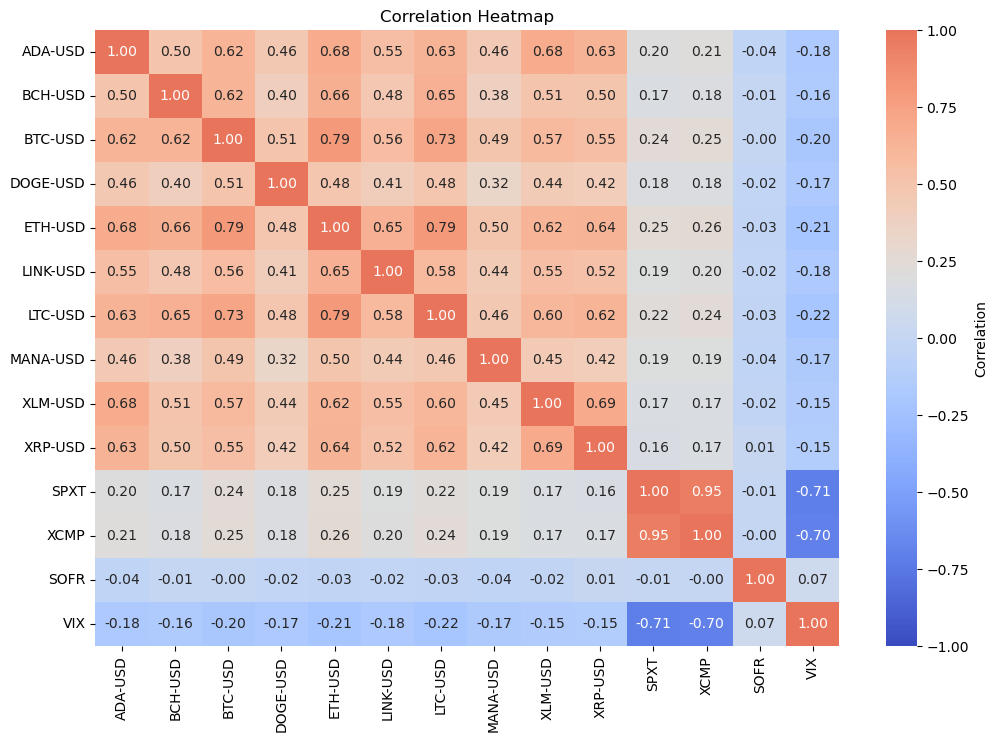

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(log_returns.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0.2,
            vmin=-1, vmax=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Heatmap')
# plt.show()
# plt.savefig(r'C:\Users\seves\Documents\EPFL - VS Studio\Blockchain\graphs\Correlation Heatmap.png')


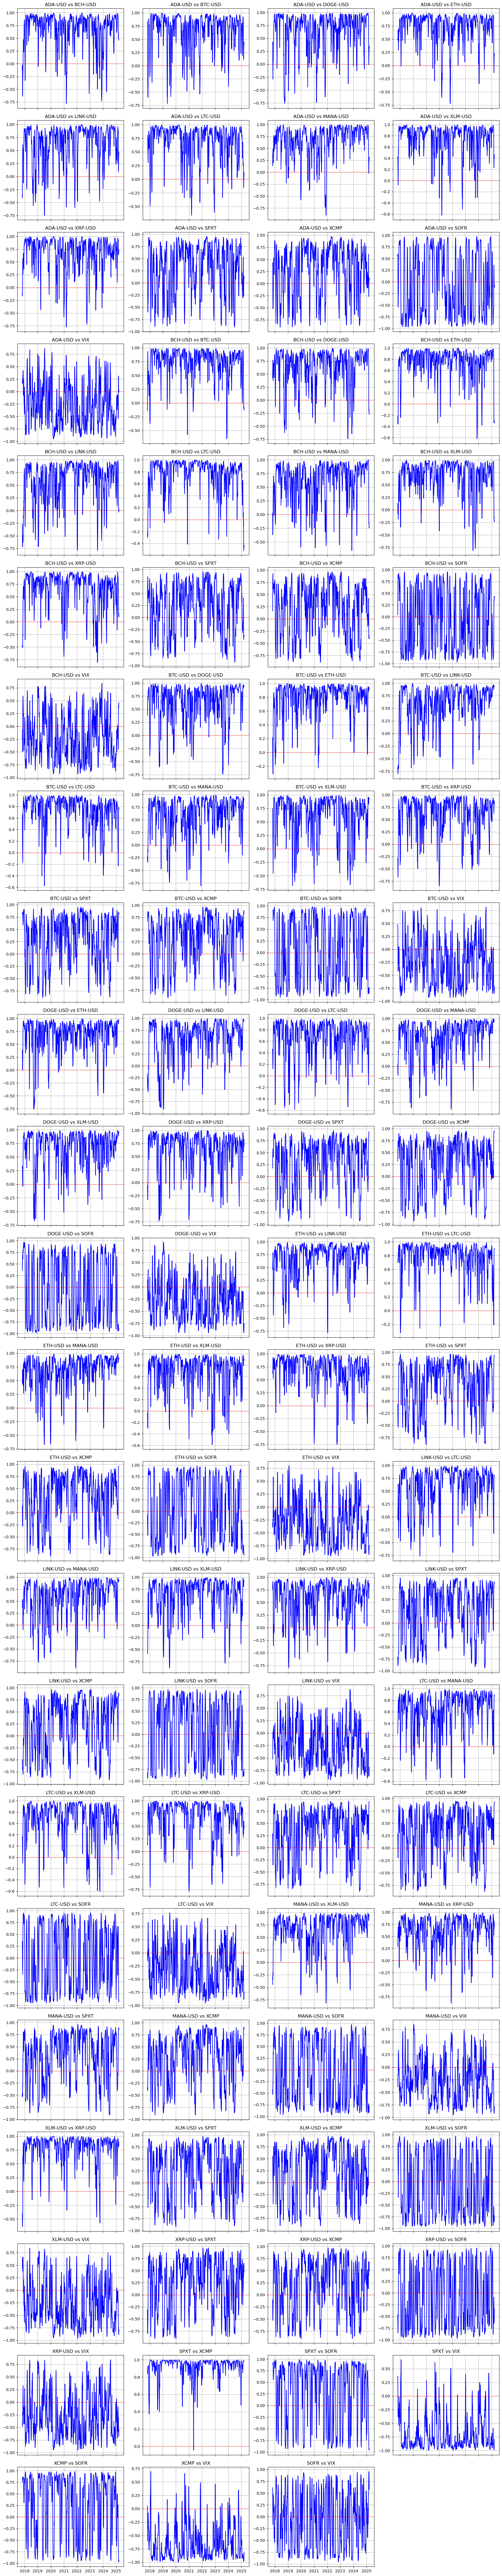

In [10]:
# Rolling correlation
window = 30 #days
columns = log_returns.columns
pairs = list(itertools.combinations(columns, 2))

# Grid layout config
n_cols = 4 # number of subplots per row
n_rows = (len(pairs) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows), sharex=True)
axes = axes.flatten()

# Loop through each pair and plot
for i, (col1, col2) in enumerate(pairs):
    rolling_corr = data[col1].rolling(window).corr(data[col2])
    axes[i].plot(rolling_corr, label=f"{col1} & {col2}", color='blue')
    axes[i].axhline(0, color='red', linestyle='--', linewidth=0.8)
    axes[i].set_title(f"{col1} vs {col2}")
    axes[i].grid(True)

# Turn off unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
# plt.show()

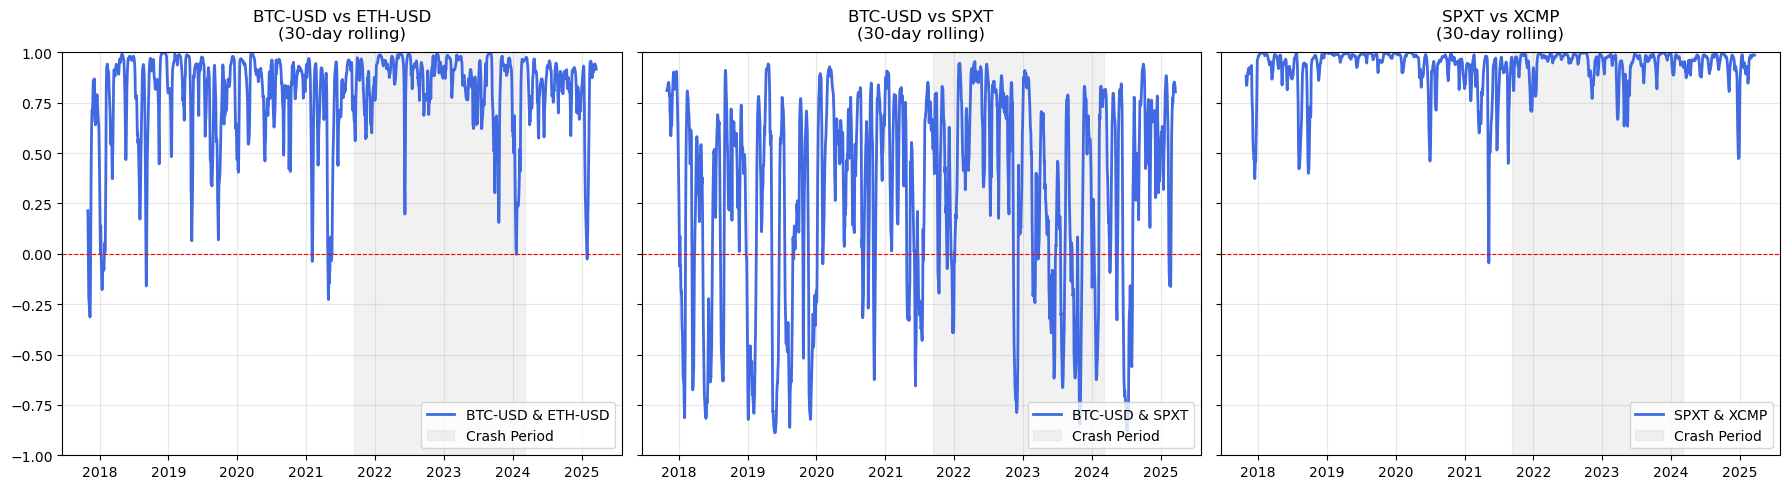

In [11]:
# Focus on these key pairs
key_pairs = [
    ('BTC-USD', 'ETH-USD'),  # Crypto vs Crypto
    ('BTC-USD', 'SPXT'),     # Crypto vs Traditional
    ('SPXT', 'XCMP')         # Traditional vs Traditional
]

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, (col1, col2) in enumerate(key_pairs):
    rolling_corr = data[col1].rolling(window).corr(data[col2])
    
    axes[i].plot(rolling_corr, label=f"{col1} & {col2}", 
                color='royalblue', linewidth=2)
    
    axes[i].axhline(0, color='red', linestyle='--', linewidth=0.8)
    axes[i].axvspan(pd.to_datetime('2021-09-11'), 
                   pd.to_datetime('2024-03-07'), 
                   color='lightgray', alpha=0.3, label='Crash Period')
    
    axes[i].set_title(f"{col1} vs {col2}\n(30-day rolling)", pad=10)
    axes[i].set_ylim(-1, 1)
    axes[i].grid(True, alpha=0.3)
    axes[i].legend(loc='lower right')

plt.tight_layout()

# plt.show()
# plt.savefig(r'C:\Users\seves\Documents\EPFL - VS Studio\Blockchain\graphs\Rolling correlation for report.png')
